<table class="tfo-notebook-buttons" align="center" width="100%">
  <td>
    <a target="_blank" href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html">
      <img src="https://github.com/dmaluenda/resources/raw/master/ub_logo.png" width="130"/>
    </a>
  </td>
  <td width=50%> <div style="text-align: center">
      <h1> Òptica Electromagnètica <br> Fresnel Coeff. and Factors </h1>
      </div>
  </td>
  <td>
      <div style="text-align: right">
         <sub> This notebook is distributed under the <br>
           <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 license
           </a>
         </sub>
      </div>
  </td>
</table>

In [1]:
# Basic libraries
import numpy as np  # maths in arrays
import matplotlib.pyplot as plt  # plotting

rad2deg = lambda rad: rad*180/np.pi

C:\Users\dmaluenda\AppData\Local\Temp\ipykernel_43480\3051967104.py:5: RuntimeWarning: invalid value encountered in arcsin
  epsilon2 = np.arcsin(n1/n2 * np.sin(epsilon1))  # refractive angle
C:\Users\dmaluenda\AppData\Local\Temp\ipykernel_43480\3051967104.py:8: RuntimeWarning: invalid value encountered in divide
  r_p = np.tan(epsilon2 - epsilon1) / np.tan(epsilon2 + epsilon1)
C:\Users\dmaluenda\AppData\Local\Temp\ipykernel_43480\3051967104.py:9: RuntimeWarning: invalid value encountered in divide
  r_s = np.sin(epsilon2 - epsilon1) / np.sin(epsilon2 + epsilon1)
C:\Users\dmaluenda\AppData\Local\Temp\ipykernel_43480\3051967104.py:12: RuntimeWarning: invalid value encountered in divide
  t_s = 2 * np.sin(epsilon2) * np.cos(epsilon1) / np.sin(epsilon2 + epsilon1)


resolution in the limit angle: 0.19º


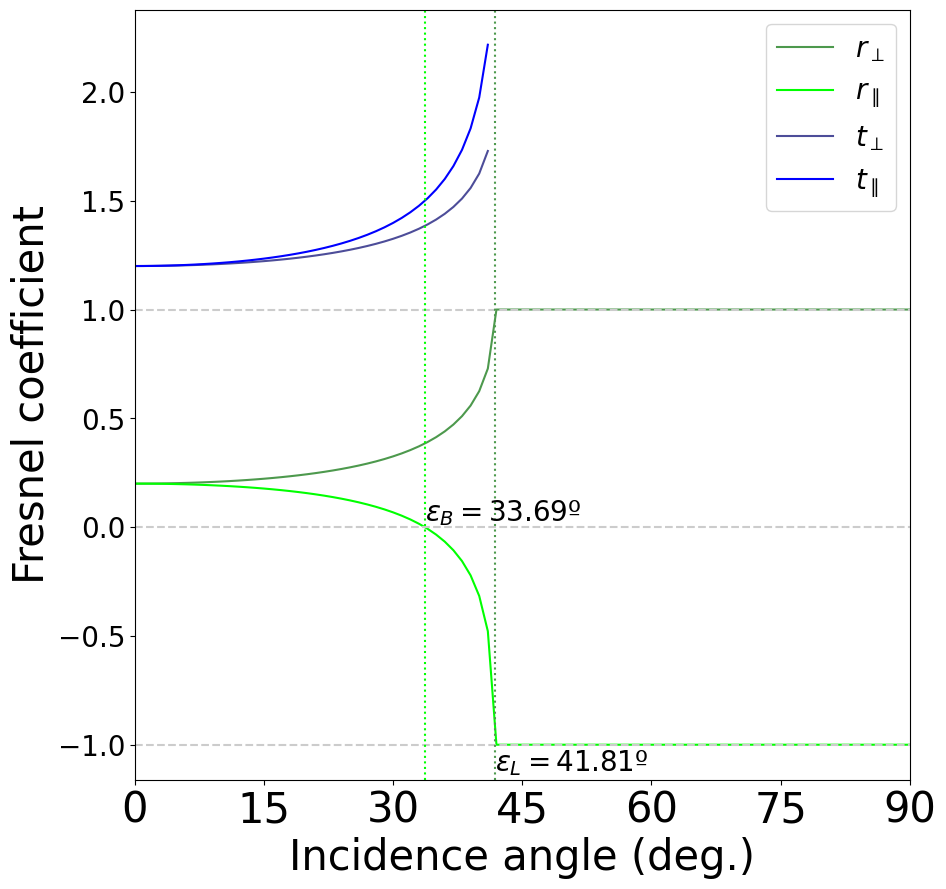

In [14]:
n1 = 1.5  # refractive index of incidence media
n2 = 1.0  # refractive index of second media

epsilon1 = np.linspace(0, np.pi/2, 91)  # incidence angle (include both 0 and 90º)
epsilon2 = np.arcsin(n1/n2 * np.sin(epsilon1))  # refractive angle

# Fresnel coefficients
r_p = np.tan(epsilon2 - epsilon1) / np.tan(epsilon2 + epsilon1)
r_s = np.sin(epsilon2 - epsilon1) / np.sin(epsilon2 + epsilon1)
r_p[0] = r_s[0] = (n1 - n2) / (n1 + n2)  # normal incidence

t_s = 2 * np.sin(epsilon2) * np.cos(epsilon1) / np.sin(epsilon2 + epsilon1)
t_p = t_s / np.cos(epsilon2 - epsilon1)
t_p[0] = t_s[0] = (2*n1) / (n2 + n1)  # normal incidence

# Total internal reflection
if np.isnan(epsilon2).any():
    # where is the first NAN for epsilon2
    limit_idx = np.where(np.isnan(epsilon2))[0][0]

    # setting all NAN values to its true absolut value 
    r_s[limit_idx:] = 1
    r_p[limit_idx:] = -1

    # just a check
    epsilonL =  np.arcsin(n2/n1)
    err_limit = rad2deg(epsilon1[limit_idx]-epsilonL)
    print(f"resolution in the limit angle: {err_limit:.2f}º")
    
else:
    limit_idx = None  # just to play with it

epsilonB = np.arctan(n2/n1)  # Theoretical Brewster angle

# some colors
rs_color = (0.3, 0.6, 0.3)  # Dark green
rp_color = (0.0, 1.0, 0.0)  # Pure Green
tp_color = (0.0, 0.0, 1.0)  # Pure Blue
ts_color = (0.3, 0.3, 0.6)  # Blue purple
br_gray  = (0.8, 0.8, 0.8)  # Bright grey

# let's plot
plt.figure(figsize=(10,10))
plt.plot(epsilon1, r_s, color=rs_color, label=r"$r_\perp$")
plt.plot(epsilon1, r_p, color=rp_color, label=r"$r_\parallel$")
plt.plot(epsilon1, t_s, color=ts_color, label=r"$t_\perp$")
plt.plot(epsilon1, t_p, color=tp_color, label=r"$t_\parallel$")

# some reference lines
plt.axhline(0, linestyle='--', color=br_gray)
plt.axhline(1, linestyle='--', color=br_gray)
plt.axhline(-1, linestyle='--', color=br_gray)
plt.axvline(epsilonB, linestyle=':', color=rp_color)
plt.annotate(r"$\epsilon_B = $"+f"{rad2deg(epsilonB):.2f}º", 
             (epsilonB, 0.03), size=20)
if limit_idx:
    plt.axvline(np.arcsin(n2/n1), linestyle=':', color=rs_color)
    plt.annotate(r"$\epsilon_L = $"+f"{rad2deg(epsilonL):.2f}º",
                 (epsilonL, -1.12), size=20)
    
plt.xticks(np.linspace(0, np.pi/2, 7),        # epsilon is in radiants
           np.linspace(0, 90, 7, dtype=int),  # let's show degrees
           size=30)  # big fontsize
plt.xlim(0,np.pi/2)
plt.xlabel("Incidence angle (deg.)", size=30)
plt.ylabel("Fresnel coefficient", size=30)
plt.yticks(fontsize=20)
plt.legend(fontsize=20);

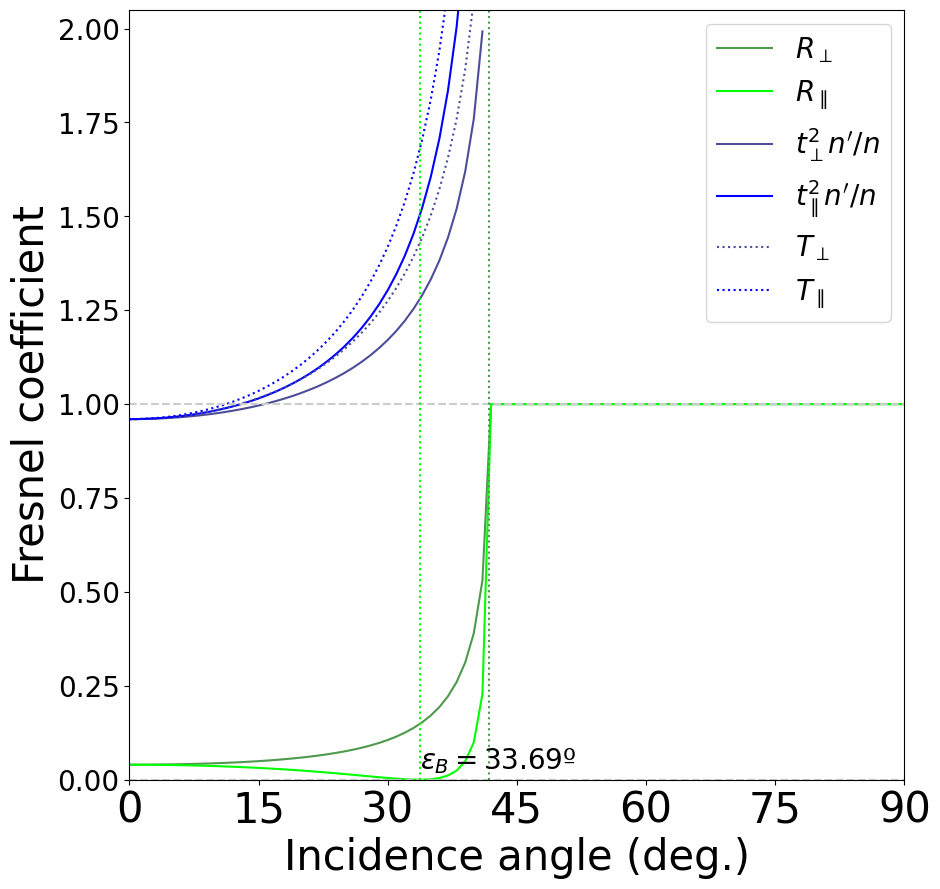

In [16]:
# let's plot
plt.figure(figsize=(10,10))
plt.plot(epsilon1, r_s**2, color=rs_color, label=r"$R_\perp$")
plt.plot(epsilon1, r_p**2, color=rp_color, label=r"$R_\parallel$")
plt.plot(epsilon1, t_s**2*n2/n1, color=ts_color, label=r"$t_\perp^2n'/n$")
plt.plot(epsilon1, t_p**2*n2/n1, color=tp_color, label=r"$t_\parallel^2n'/n$")
plt.plot(epsilon1, t_s**2*n2/n1*geo_factor, ':',color=ts_color, label=r"$T_\perp$")
plt.plot(epsilon1, t_p**2*n2/n1*geo_factor, ':',color=tp_color, label=r"$T_\parallel$")

# some reference lines
plt.axhline(0, linestyle='--', color=br_gray)
plt.axhline(1, linestyle='--', color=br_gray)
plt.axhline(-1, linestyle='--', color=br_gray)
plt.axvline(epsilonB, linestyle=':', color=rp_color)
plt.annotate(r"$\epsilon_B = $"+f"{rad2deg(epsilonB):.2f}º", 
             (epsilonB, 0.03), size=20)
if limit_idx:
    plt.axvline(np.arcsin(n2/n1), linestyle=':', color=rs_color)
    plt.annotate(r"$\epsilon_L = $"+f"{rad2deg(epsilonL):.2f}º",
                 (epsilonL, -1.12), size=20)
    
plt.xticks(np.linspace(0, np.pi/2, 7),        # epsilon is in radiants
           np.linspace(0, 90, 7, dtype=int),  # let's show degrees
           size=30)  # big fontsize
plt.xlim(0,np.pi/2)
plt.ylim(0,2.05)
plt.xlabel("Incidence angle (deg.)", size=30)
plt.ylabel("Fresnel coefficient", size=30)
plt.yticks(fontsize=20)
plt.legend(fontsize=20);

All parallel factors sums 1?       True
All perpendicular factors sums 1?  True
All general factors sums 1?        True


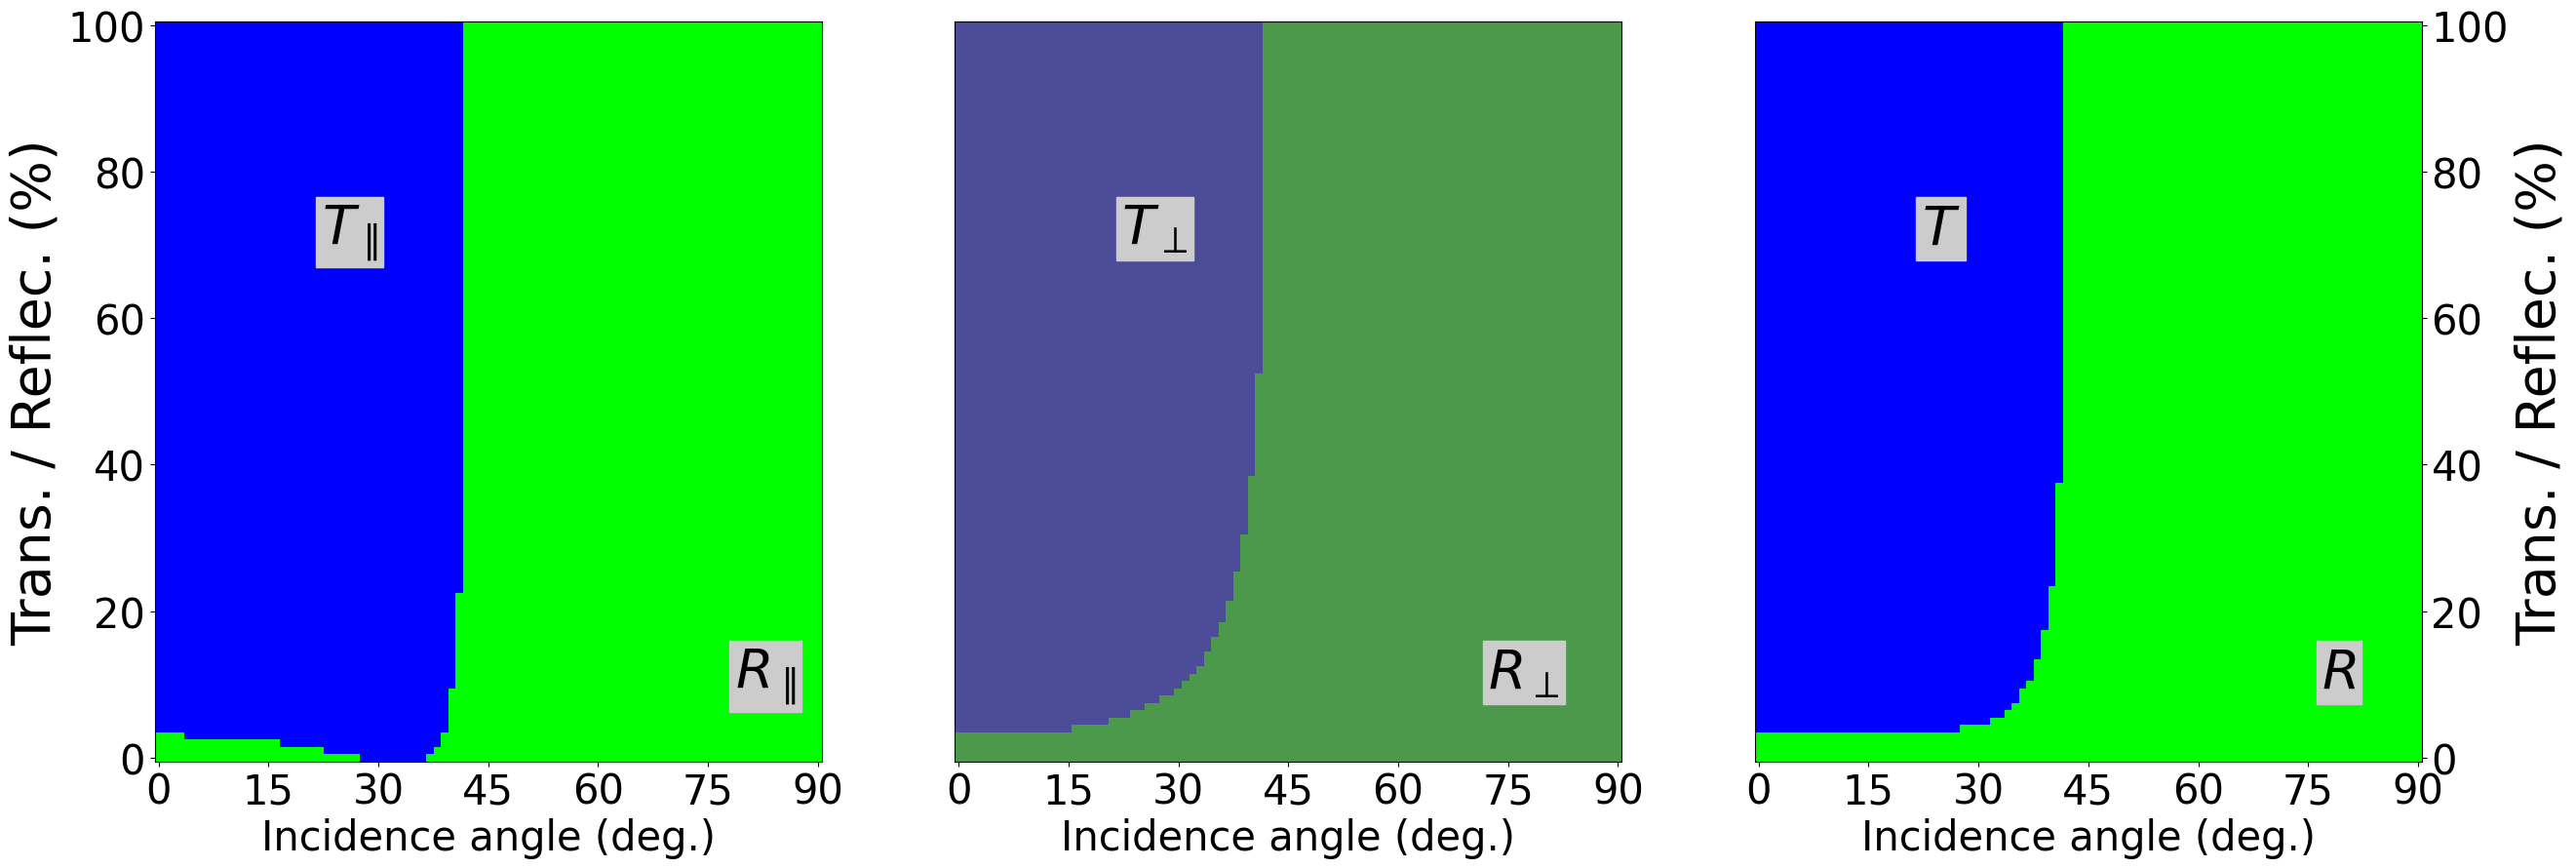

In [17]:
# Fresnel Factors

# Reflective factors are just the square
R_p = r_p**2
R_s = r_s**2
R = (R_p + R_s ) / 2

# Transmission factors must have into account the geometric factor
geo_factor = np.cos(epsilon2)/np.cos(epsilon1)
T_p = t_p**2 * n2/n1 * geo_factor
T_s = t_s**2 * n2/n1 * geo_factor

# Above limit angle, no transmission
if limit_idx:
    T_p[limit_idx:] = 0
    T_s[limit_idx:] = 0

T = (T_p + T_s) / 2

# Let's check if energy is conserved
print(f"All parallel factors sums 1?       "
      f"{all([x<=1.001 and x>=0.999 for x in R_p+T_p])}")

print(f"All perpendicular factors sums 1?  "
      f"{all([x<=1.001 and x>=0.999 for x in R_s+T_s])}")

print(f"All general factors sums 1?        "
      f"{all([x<=1.001 and x>=0.999 for x in R+T])}")

# Let's make images to plot ratios of energy
ratio_p = np.zeros((101, 91, 3))  # 101 because it contains both 0% and 100%
ratio_s = np.zeros((101, 91, 3))  #  91 because it contains both 0º and 90º
ratio   = np.zeros((101, 91, 3))  #   3 for the three basic colors RGB

# Filling the images in columns of incidents angle
for idx in range(len(epsilon1)):
    Rp_idx = int(R_p[idx]*101)
    # Reflection parallel    (let's fill until the R_p value)
    ratio_p[:Rp_idx, idx, 0] = rp_color[0]  # R
    ratio_p[:Rp_idx, idx, 1] = rp_color[1]  # G
    ratio_p[:Rp_idx, idx, 2] = rp_color[2]  # B
    # Transmission parallel  (let's fill from the R_p value, the rest)
    ratio_p[Rp_idx:, idx, 0] = tp_color[0]  # R
    ratio_p[Rp_idx:, idx, 1] = tp_color[1]  # G
    ratio_p[Rp_idx:, idx, 2] = tp_color[2]  # B

    Rs_idx = int(R_s[idx]*101)
    # Transmission parallel
    ratio_s[Rs_idx:, idx, 0] = ts_color[0]  # R
    ratio_s[Rs_idx:, idx, 1] = ts_color[1]  # G
    ratio_s[Rs_idx:, idx, 2] = ts_color[2]  # B
    # Reflection parallel
    ratio_s[:Rs_idx, idx, 0] = rs_color[0]  # R
    ratio_s[:Rs_idx, idx, 1] = rs_color[1]  # G
    ratio_s[:Rs_idx, idx, 2] = rs_color[2]  # B

    R_idx = int(R[idx]*101)
    # Transmission parallel
    ratio[R_idx:, idx, 0] = 0  # R
    ratio[R_idx:, idx, 1] = 0  # G
    ratio[R_idx:, idx, 2] = 1  # B
    # Reflection parallel
    ratio[:R_idx, idx, 0] = 0  # R
    ratio[:R_idx, idx, 1] = 1  # G
    ratio[:R_idx, idx, 2] = 0  # B

# let's plot the three images
fig, axs = plt.subplots(1, 3, figsize=(30,10))
axs[0].imshow(ratio_p, origin='lower')
axs[1].imshow(ratio_s, origin='lower')
axs[2].imshow(ratio, origin='lower')

# Y-axis just in the first (at left) and last (at right)
[axs[i].set_ylabel(r'Trans. / Reflec. (%)', size=40) for i in [0, 2]]
[axs[i].yaxis.set_tick_params(labelsize=30) for i in [0, 2]]
axs[1].set_yticks([])  # no ticks for the middle plot
axs[2].yaxis.tick_right()
axs[2].yaxis.set_label_position("right")


[ax.set_xlabel("Incidence angle (deg.)", size=30) for ax in axs]
[ax.xaxis.set_tick_params(labelsize=30) for ax in axs]
[ax.set_xticks(np.linspace(0, 90, 7)) for ax in axs]

# Some labels in the plots
axs[0].text(0.87, 0.1, r"$R_\parallel$", transform=axs[0].transAxes, 
            size=40, color='black', backgroundcolor=br_gray)

axs[1].text(0.80, 0.1, r"$R_\perp$", transform=axs[1].transAxes, 
            size=40, color='black', backgroundcolor=br_gray)

axs[2].text(0.85, 0.1, r"$R$", transform=axs[2].transAxes, 
            size=40, color='black', backgroundcolor=br_gray)

axs[0].text(0.25, 0.7, r"$T_\parallel$", transform=axs[0].transAxes, 
            size=40, color='black', backgroundcolor=br_gray)

axs[1].text(0.25, 0.7, r"$T_\perp$", transform=axs[1].transAxes, 
            size=40, color='black', backgroundcolor=br_gray)

axs[2].text(0.25, 0.7, r"$T$", transform=axs[2].transAxes, 
            size=40, color='black', backgroundcolor=br_gray);

Text(0, 0.5, 'Reflection factor  $R=r^2$   (%)')

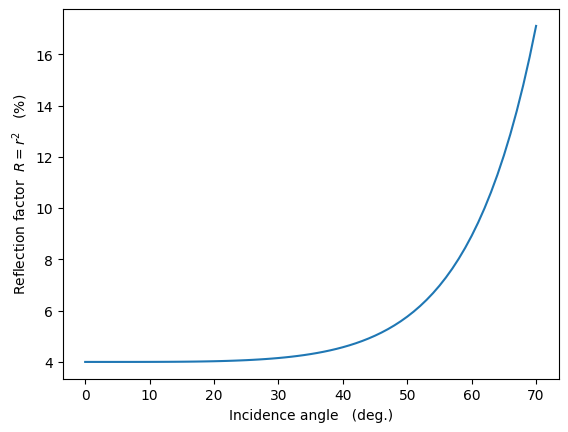

In [4]:
plt.plot(rad2deg(epsilon1[:-20]), R[:-20]*100)
plt.xlabel('Incidence angle   (deg.)')
plt.ylabel('Reflection factor  $R=r^2$   (%)')